In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('forest_fires.csv')

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.shape

(517, 13)

The Forest fire dataset contains the area of fires based on various parameters. There are 13 parameters out of which "area" is the Dependent variable and rest are Independent variable.

Based on sources, the variables are defined as:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [ ]:
# Description of the data
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


From the dataset description, we can observe following things:

1. The count for all the variables are same and hence we can say that there are no null values present although we shall check for null values separately for confirmation.
2. The minimum area value is 0 which means that there is no burned area.

In [ ]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

As Predicted from data description, there are no null values present.

In [ ]:
# Data types are correct.
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
# Last 5 entries of the dataset
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


# How many areas have 0 entries?

In [ ]:
# Lets see how many areas have 0 entries
df[df['area'] == 0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.0
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


There are 247 rows with zero entries. We can see that there are more zeros in "rain" variable too. Lets see the relation between rain and area.

# Plotting area based on Rain

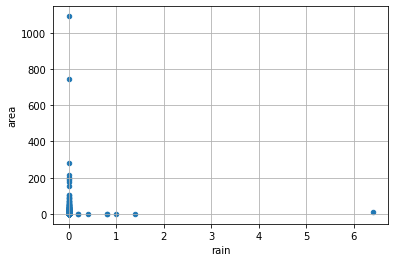

In [ ]:
df.plot.scatter('rain', 'area')
plt.grid()
plt.show()

We see that for most of the cases where rain is 0, the burnt area is more. Also, as the rain is increased, the area burnt is very less.

In [ ]:
zero_rain = df[df['rain'] == 0]
zero_rain

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


zero_rain contains the dataframe for rain value as zero.

# Plotting area burnt based on month and day

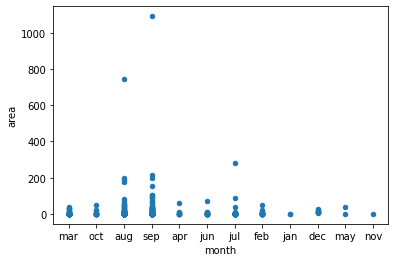

In [ ]:
df.plot.scatter('month', 'area')
plt.show()

From the month analysis, we can observe that the burnt area is maximum in September month following with Aug and July. Also, Novemeber and Jan consists of least amount of area burnt.

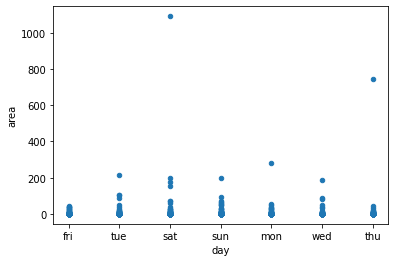

In [ ]:
df.plot.scatter('day', 'area')
plt.show()

From the day analysis, we can observe that the burnt area is maximum on Saturday following with Thursday. So, we can think Saturday on September we have the max area burnt. We shall validate it by get the dataframe of maximum area burnt.

# Maximum area burnt

In [ ]:
df[df['area'] == df['area'].max()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84


From this, we can observe that on Saturday of september, we observed maximum area burnt with '0' mm/m2 amount of rain, '4' km/hr of wind.

# Area based on wind and RH

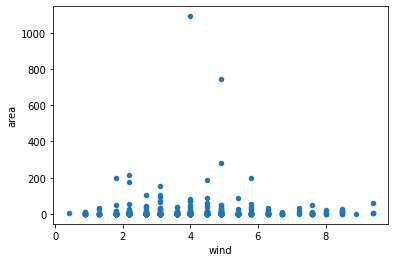

In [ ]:
df.plot.scatter('wind', 'area')
plt.show()

In [ ]:
data = df.groupby('wind')['area'].count()
data

wind
0.4     1
0.9    13
1.3    14
1.8    31
2.2    53
2.7    44
3.1    53
3.6    40
4.0    51
4.5    41
4.9    48
5.4    41
5.8    24
6.3    19
6.7     8
7.2     4
7.6    14
8.0     5
8.5     8
8.9     1
9.4     4
Name: area, dtype: int64

From wind analysis, we can see that wind value of 4.0 has the highest area burnt and for wind value of 3.1, the area burnt is around 53 times.

RH analysis

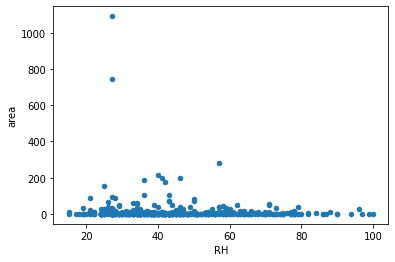

In [ ]:
df.plot.scatter('RH', 'area')
plt.show()

From RH analysis, we can observe that max area burnt is obtained for an RH level of around 25-30.

In [ ]:
a = df.groupby('RH')[['area']].mean()
a

,area
RH,
15,5.53
17,0.00
18,0.00
19,7.93
20,0.00
...,...
94,0.00
96,26.00
97,0.00


# Analysis based on range between two variables.

In [ ]:
data = df[(df['rain']==0) & (df['temp']>30)]
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
28,6,3,sep,sat,93.4,145.4,721.4,8.1,30.2,24,2.7,0.0,0.00
421,2,4,aug,wed,95.2,217.7,690.0,18.0,30.8,19,4.5,0.0,0.00
480,9,9,jul,thu,93.2,114.4,560.0,9.5,30.2,25,4.5,0.0,2.75
481,4,3,jul,thu,93.2,114.4,560.0,9.5,30.2,22,4.9,0.0,0.00
483,8,6,aug,sun,94.9,130.3,587.1,14.1,31.0,27,5.4,0.0,0.00
484,2,5,aug,sun,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,26.43
485,2,4,aug,mon,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,2.07
491,4,4,aug,thu,95.8,152.0,624.1,13.8,32.4,21,4.5,0.0,0.00
492,1,3,aug,fri,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00
494,6,6,aug,sat,96.0,164.0,643.0,14.0,30.8,30,4.9,0.0,8.59


Here, we are filtering the dataframe based on rain = 0 and temperature = 30degc, in which we can see max area burnt is around 40.54 for temperature = 33.3 degc.

# Histogram analysis

HIstogram gives the distribution of each individual varaibles. Based on this, we can identify the amount of skewness present in the variable.

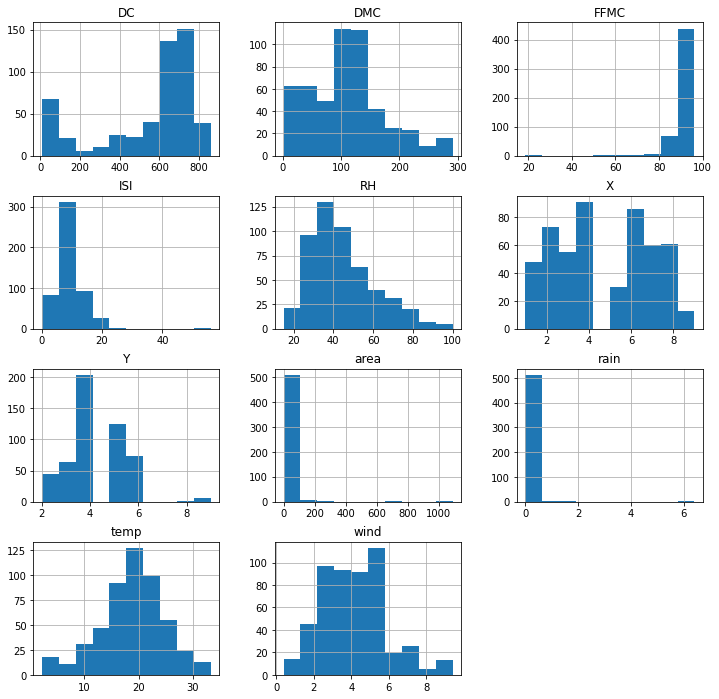

In [ ]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

Histogram analysis gives the skewness details of the varaibles.

1. We can see that area, rain and wind is completely right skewed.
2. FFMC is left skewed.
3. Variable Temp kind of shows normal distribution.

# Correlation details

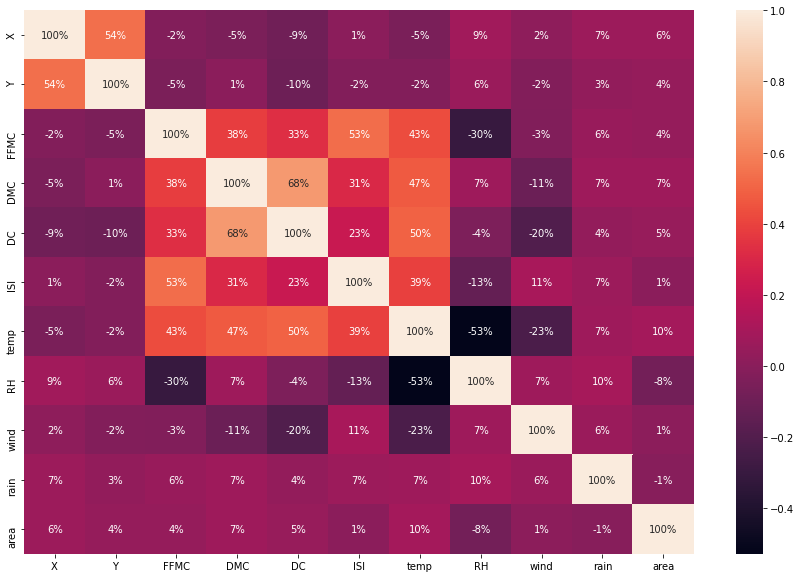

In [ ]:
# Co-relation matrix
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')
plt.show()

From the co-relation matrix, we can make following observations:

1. The co-realtion matrix contains both negative and positive co-relations.
2. We can see that, there is 53% decrease in RH (Relative humidity) for every increase in temperature and vice-verca as from matrix.
3. The burnt area gives a major impact in terms of relative humidity. As RH is increased, there 8% decrease in area burnt. This means that it may not burn hot enough.

# Conclusion

1. The forest dataset contains the area of fire burnt based on various parameters.
2. We have seen that the max area burnt is on September month and on Saturday. 
3. We see that as the area burnt is more when there is no rain.
4. We observe that the max area burnt is when the wind is of 4.0 km/hr and Relative humidity of 27 and temperature of 25.1 degc.
5. The variable month and day has to be converted to Categorical variable so that the dataset will be ready for ML model.